<a href="https://colab.research.google.com/github/tashir0605/SentimentSphere/blob/main/Human_Emotion_through_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Text Emotion Detection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

**Dataset**

In [4]:
df=pd.read_csv("emotion_dataset_raw.csv")

In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
df['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


<Axes: xlabel='Emotion', ylabel='count'>

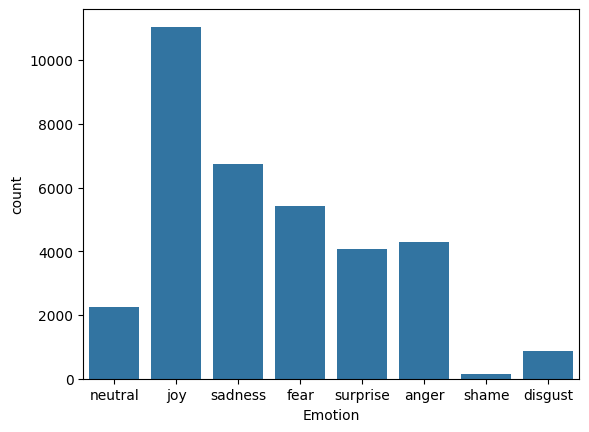

In [7]:
sns.countplot(x='Emotion',data=df)

**Data pre-processing**

In Natural Language Processing (NLP), **neattext** refers to a Python library designed to provides a set of simple and easy-to-use functions for cleaning, formatting, and processing text data.

**Some of the common functionalities offered by the neattext library include:**

1. Removing special characters and unwanted symbols

2. Normalization: This includes tasks like converting text to lowercase, expanding contractions (e.g., changing "I'm" to "I am"), and removing stopwords (common words like "the", "is", etc. that don’t add much meaning in NLP tasks).

3. Handling tokenization: neattext can tokenize a given sentence into words, which is useful for many downstream NLP tasks.

4. Text formatting: It provides tools for removing extra whitespaces, line breaks, and formatting issues.

In [8]:
!pip install neattext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.5 MB/s eta 0:00:00


In [9]:
import neattext.functions as nfx

**User handles** in this case are references to social media usernames, which typically begin with an "@" symbol (e.g., @username).

In [10]:
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [11]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


Code to see the Functions under neattext

In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
# Remove the Stopwords
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


**Splitting data into input variables and target variable**

**x**: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

**y**: Labels are the output or the target variable.

In [15]:
x=df['Clean_Text']
y=df['Emotion']

**Splitting data into train and test set**

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)